In [1]:
from os import listdir
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from PIL import Image
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import random

Using TensorFlow backend.


In [2]:
def load_photos(directory):
    images = []
    labels_dir = []
    dir_list = listdir(directory)
    random.shuffle(dir_list)
    for name in dir_list:
        filename = directory + '/' + name
        # load an image from file
        image = load_img(filename, target_size=(96, 160))
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        # get image id + labels
        value_dir = float(name.split('_')[0])
        labels_dir.append(value_dir)
        images.append(image)
    return images, labels_dir

In [3]:
dataset = "../../../../Big_Race"

In [4]:
# load images from both train and test groups
directory = dataset+'/Train'
images, labels_dir = load_photos(directory)
nb_images = len(images)
print('Loaded Images and labels for training: %d' % nb_images)

Loaded Images and labels for training: 2778


In [5]:
#Normalise images
images = np.array(images)
images /= 255.0

In [6]:
#convert datas to dummyvalues
labels_dir = np.array(pd.get_dummies(labels_dir))

(array([0, 0, 1], dtype=uint8), <matplotlib.image.AxesImage at 0x1aa1c0e2b00>)

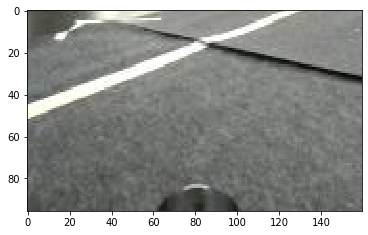

In [7]:
labels_dir[42], plt.imshow(images[42])

In [8]:
from keras.models import Model, Sequential
from keras.layers import *
import keras.backend as K
import keras.optimizers as Optimizers
import keras.callbacks

In [9]:
#from keras.models import load_model
#model = load_model("model_bigrace_original_5.h5")

In [10]:
'''
Model from PatateV2
'''

K.clear_session()
############################################################# 

img_in = Input(shape=(96, 160, 3), name='img_in')
x = img_in

x = Convolution2D(2, (5,5), strides=(2,2), use_bias=False)(x)       
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Convolution2D(4, (5,5), strides=(2,2), use_bias=False)(x)       
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(.4)(x)
x = Convolution2D(8, (5,5), strides=(2,2), use_bias=False)(x)       
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(.5)(x)

x = Flatten(name='flattened')(x)

x = Dense(100, use_bias=False)(x) 
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(.4)(x)
x = Dense(50, use_bias=False)(x)  
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(.3)(x)

out_dir = Dense(3, activation='softmax')(x)


# Compile Model
model = Model(inputs=[img_in], outputs=[out_dir])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

W1130 10:23:23.510241 20604 deprecation_wrapper.py:119] From c:\users\rock_\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:88: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W1130 10:23:23.511240 20604 deprecation_wrapper.py:119] From c:\users\rock_\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:91: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W1130 10:23:23.570081 20604 deprecation_wrapper.py:119] From c:\users\rock_\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1130 10:23:23.571082 20604 deprecation_wrapper.py:119] From c:\users\rock_\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:507

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img_in (InputLayer)          (None, 96, 160, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 78, 2)         150       
_________________________________________________________________
batch_normalization_1 (Batch (None, 46, 78, 2)         8         
_________________________________________________________________
activation_1 (Activation)    (None, 46, 78, 2)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 37, 4)         200       
_________________________________________________________________
batch_normalization_2 (Batch (None, 21, 37, 4)         16        
_________________________________________________________________
activation_2 (Activation)    (None, 21, 37, 4)         0         
__________

In [12]:
model_name="model_race.h5"

In [13]:
#save best model if model improved
best_checkpoint = keras.callbacks.ModelCheckpoint(model_name, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [14]:
h = model.fit(images, labels_dir, batch_size=64, epochs=100, validation_split=0.2, verbose=1, callbacks=[best_checkpoint])

W1130 10:23:32.130806 20604 deprecation.py:323] From c:\users\rock_\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 2222 samples, validate on 556 samples
Epoch 1/100
2222/2222 [==============================] - 6s 3ms/step - loss: 1.0613 - acc: 0.4824 - val_loss: 0.7304 - val_acc: 0.7194

Epoch 00001: val_loss improved from inf to 0.73036, saving model to model_race.h5
Epoch 2/100
2222/2222 [==============================] - 5s 2ms/step - loss: 0.8781 - acc: 0.5846 - val_loss: 0.6085 - val_acc: 0.7842

Epoch 00002: val_loss improved from 0.73036 to 0.60851, saving model to model_race.h5
Epoch 3/100
2222/2222 [==============================] - 5s 2ms/step - loss: 0.7472 - acc: 0.6697 - val_loss: 0.5096 - val_acc: 0.8040

Epoch 00003: val_loss improved from 0.60851 to 0.50964, saving model to model_race.h5
Epoch 4/100
2222/2222 [==============================] - 5s 2ms/step - loss: 0.6479 - acc: 0.7318 - val_loss: 0.4510 - val_acc: 0.8076

Epoch 00004: val_loss improved from 0.50964 to 0.45102, saving model to model_race.h5
Epoch 5/100
2222/2222 [==============================] - 5s 2ms/step 

2222/2222 [==============================] - 6s 3ms/step - loss: 0.2168 - acc: 0.9185 - val_loss: 0.1580 - val_acc: 0.9442

Epoch 00043: val_loss did not improve
Epoch 44/100
2222/2222 [==============================] - 6s 3ms/step - loss: 0.2153 - acc: 0.9154 - val_loss: 0.2218 - val_acc: 0.9299

Epoch 00044: val_loss did not improve
Epoch 45/100
2222/2222 [==============================] - 6s 3ms/step - loss: 0.2119 - acc: 0.9154 - val_loss: 0.2021 - val_acc: 0.9317

Epoch 00045: val_loss did not improve
Epoch 46/100
2222/2222 [==============================] - 5s 2ms/step - loss: 0.2301 - acc: 0.9118 - val_loss: 0.1604 - val_acc: 0.9388

Epoch 00046: val_loss did not improve
Epoch 47/100
2222/2222 [==============================] - 5s 2ms/step - loss: 0.2059 - acc: 0.9253 - val_loss: 0.1598 - val_acc: 0.9424

Epoch 00047: val_loss did not improve
Epoch 48/100
2222/2222 [==============================] - 5s 2ms/step - loss: 0.2156 - acc: 0.9176 - val_loss: 0.1754 - val_acc: 0.9299

E

2222/2222 [==============================] - 6s 3ms/step - loss: 0.1339 - acc: 0.9473 - val_loss: 0.1287 - val_acc: 0.9586

Epoch 00089: val_loss improved from 0.13426 to 0.12872, saving model to model_race.h5
Epoch 90/100
2222/2222 [==============================] - 6s 3ms/step - loss: 0.1400 - acc: 0.9428 - val_loss: 0.1398 - val_acc: 0.9532

Epoch 00090: val_loss did not improve
Epoch 91/100
2222/2222 [==============================] - 6s 3ms/step - loss: 0.1408 - acc: 0.9442 - val_loss: 0.1784 - val_acc: 0.9442

Epoch 00091: val_loss did not improve
Epoch 92/100
2222/2222 [==============================] - 6s 3ms/step - loss: 0.1547 - acc: 0.9428 - val_loss: 0.1315 - val_acc: 0.9532

Epoch 00092: val_loss did not improve
Epoch 93/100
2222/2222 [==============================] - 6s 3ms/step - loss: 0.1431 - acc: 0.9455 - val_loss: 0.1400 - val_acc: 0.9406

Epoch 00093: val_loss did not improve
Epoch 94/100
2222/2222 [==============================] - 6s 3ms/step - loss: 0.1539 - acc

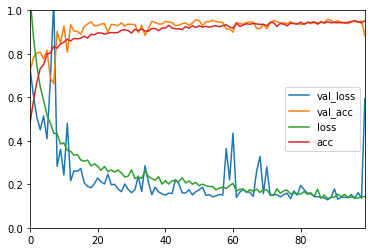

In [15]:
#print History graph
historydf = pd.DataFrame(h.history, index=h.epoch)
historydf.plot(ylim=(0,1))